# CellBio task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from cell_bio import CellBio
from dataset_generator import DataSetGenerator

In [2]:
u = Utils()
dg = DataSetGenerator()

## Error test (low complexity)

root K8NE
leaf 72I1
{('K8NE', 'DEIE'): 1.1, ('K8NE', 'G3I7'): 4.2, ('K8NE', '972S'): 2.2, ('K8NE', '72I1'): 4.1, ('DEIE', 'UKLF'): 2.5, ('UKLF', '72I1'): 1.7, ('G3I7', 'EDU0'): 2.3, ('EDU0', '72I1'): 1.1, ('972S', 'ASAZ'): 0.5, ('ASAZ', '72I1'): 2.1}


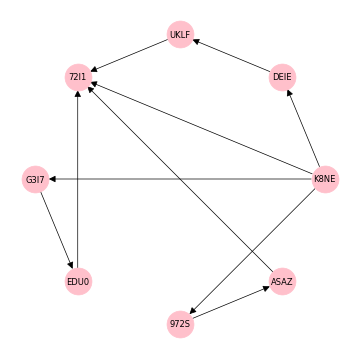

TypeError: 'NoneType' object is not iterable

In [4]:
size = [[2,2,2],[2,2,2],[2,2,2]]
tg = CellBio(n_per_bcc = size, 
             bcc_types = [["cycle"]*len(size[0])]*len(size))
'''
context = tg.get_causal_context()
patient_history = tg.get_sample_context(n_extra_vars = 2)
print()
print("Context:", context)
print()
print("Patient history:", patient_history)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
'''

In [ ]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())

In [ ]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

In [ ]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

In [ ]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

In [ ]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())

In [ ]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())

## Error test (moderate complexity)

In [ ]:
size = [[3,3],[3,3],[3,3]]
tg = CellBio(n_per_bcc = size, 
                   bcc_types = ["cycle"]*len(size))
'''
context = tg.get_causal_context()
patient_history = tg.get_sample_context(n_extra_vars = 2)
print()
print("Context:", context)
print()
print("Patient history:", patient_history)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
'''

In [ ]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())

In [ ]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

In [ ]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

In [ ]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

In [ ]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())

In [ ]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())

In [ ]:
glo = [tg.get_global()]
loc = tg.get_local()
comp = tg.get_compositions()

print(glo)
print(loc)
print(comp)

In [ ]:
# Get PNS and compare to ATE.
results_dict = dict()
for n in [5,10,50,100,500,1000,5000]:
    pair_dict = dict()
    for pair in glo+loc:
        df_cf, df_noise = tg.sample_scm(n = n,
                                        intervene_node = pair[0],
                                        intervene_value = 1)
        df_cf.rename(columns={pair[1]: 'True (cause = True)'}, inplace = True)
        df_cf_0, df_noise = tg.sample_scm(n = n,
                                          intervene_node = pair[0],
                                          intervene_value = 0)
        df_cf["True (cause = False)"] = df_cf_0[pair[1]]
        display(df_cf.head(5))
        print("\n-- {} | n = {} --".format(pair,n))
        pns = dg.get_pns_ate(df_cf)
        pair_dict[pair] = pns
    results_dict[n] = pair_dict

In [ ]:
for n,res in results_dict.items():
    print("\n-- n = {} --".format(n))
    comp_pns = 1
    for pair,pns in res.items():
        if pair == glo[0]:
            global_pns = pns
        else:
            comp_pns *= pns
    print("Global PNS  =", global_pns)
    print("Composition =", comp_pns)

In [ ]:
results_dict

## Error test (high complexity)

In [ ]:
size = [[3,5],[3,4,3],[4,4,4]]
tg = CellBio(n_per_bcc = size, 
                   bcc_types = ["wheel"]*len(size))
'''
context = tg.get_causal_context()
patient_history = tg.get_sample_context(n_extra_vars = 2)
print()
print("Context:", context)
print()
print("Patient history:", patient_history)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
'''

In [ ]:
print(tg.exog_names)
print(tg.exog_true_binary)
print(tg.alleles_obs)
print(tg.fam_hist_obs)
print(tg.prev_surg_obs)

## Generate dataset

In [ ]:
# x levels of graphical complexity (captured by BCC size).
# y tasks per graphical complexity level.
# z samples per task.
# w replicates per sample.
# = x*y*z*w subtasks.
graph_sizes = [[2,2],[3,3],[4,4]]
n_tasks_per_size = 3
n_samples_per_task = 1000
reps_per_sample = 5

df = dg.get_dataset(task_generator = CellBio,
                    graph_sizes = graph_sizes,
                    n_tasks_per_size = n_tasks_per_size,
                    n_samples_per_task = n_samples_per_task, 
                    reps_per_sample = reps_per_sample)

display(df)

In [ ]:
# Process prompts.
df_factual, df_cf = dg.process_prompts()
display(df_factual)
display(df_cf)

In [ ]:
pns_dict = dg.get_pns_dict(verbose = True)
pns_dict

In [ ]:
threshold_dict = dg.get_internal_consistency_thresholds(multiplier = 1.25)
threshold_dict

In [ ]:
# Test save and load with numpy.
np.save("clinical_notes_threshold_dict.npy", threshold_dict) 
read_dictionary = np.load("clinical_notes_threshold_dict.npy",
                          allow_pickle = "TRUE").item()
display(read_dictionary)

In [ ]:
df_cf[df_cf["Context ID"] == 0]

In [ ]:
df_cf[(df_cf["Context ID"] == 0) & (df_cf["Cause-effect pair"] == ("pain", "surgery"))]

In [ ]:
df_cf[(df_cf["Context ID"] == 1) & (df_cf["Cause-effect pair"] == ("pain", "surgery"))]

## End of document